### Graph Visual Representation
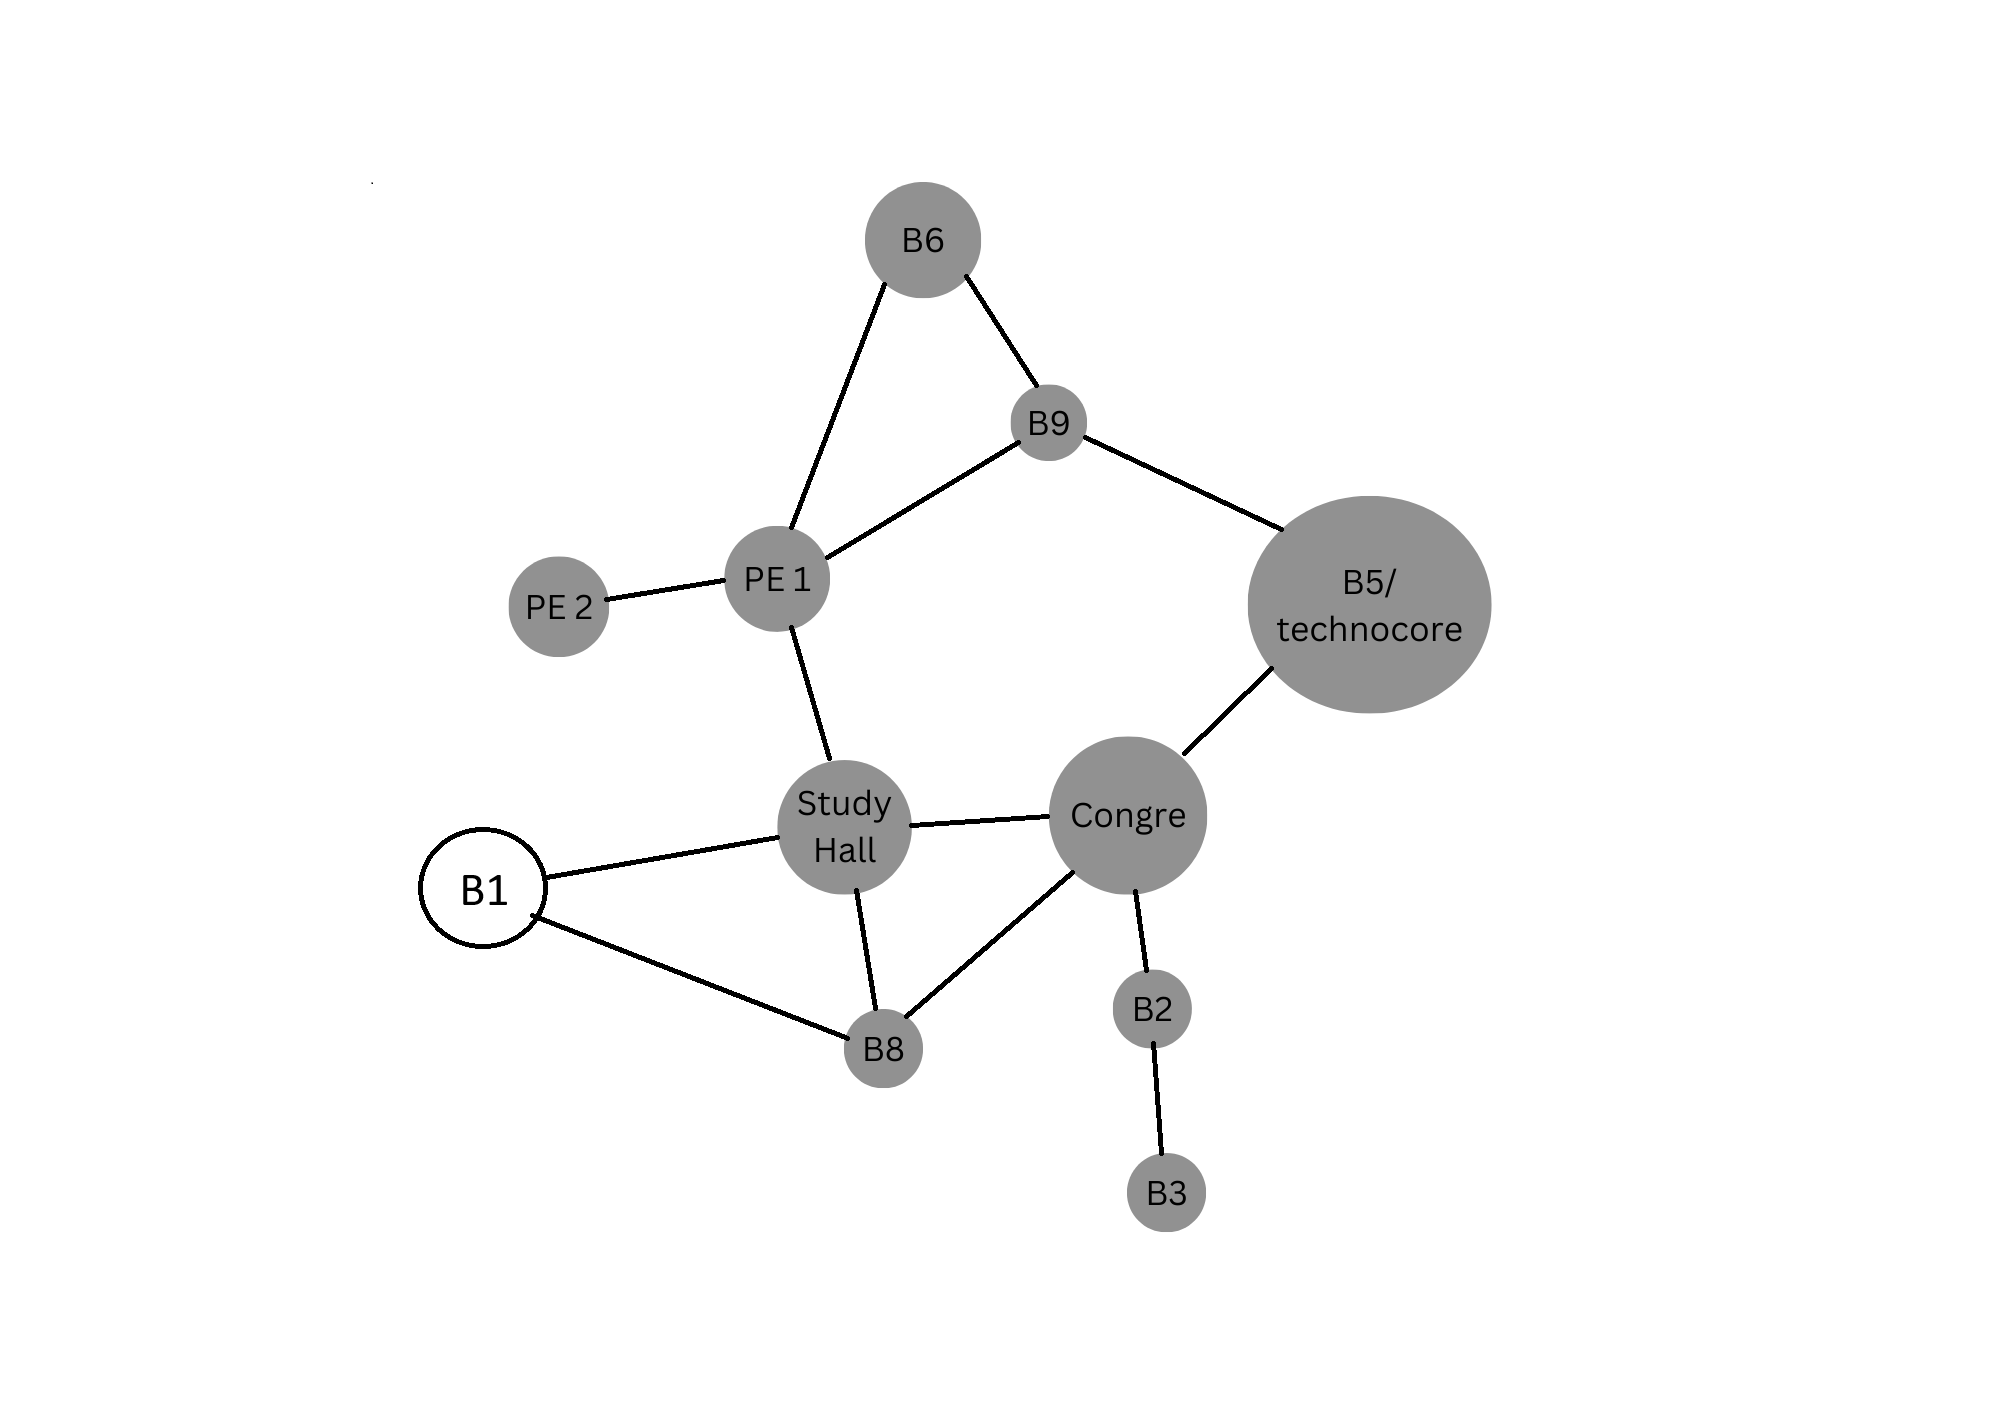

### Create a class Node

In [1]:
class Node:
    def __init__(self,name,BDict):
        """assume name is a string, and BDict is a dictionary with
        keys corresponds to the floors and the value is a list of offices per floor"""
        self.name = name
        self.BDict = BDict
    def getName(self):
        return self.name
    def getBDict(self):
        return self.BDict

### Create a class edge for connecting the buildings

In [2]:
class Edge:
    def __init__(self,src,dest):
        """src and dest are nodes that we'll be connecting"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

### Create a class for making the graph of tip

In [3]:
class Graph:
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
        self.edges[dest].append(src) # connection of a bidirected graph
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def getDictionary(self,name):
        for n in self.edges:
            if n.getName() == name:
                return n.getBDict()
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1]

### Create a function in building the TIP QC campus in a graph

In [4]:
def buildTIPGraph():
    g = Graph()
    # Create nodes for each building with its corresponding floors and offices
    buildings_info = {
        'PE 1': {'1st Floor': ['PE FACULTY']},
        'PE 2': {'1st Floor': ['PARKING']},
        'B6': {'1st Floor': [],'2nd Floor':[],'3rd Floor':[],
               '4th Floor':[],'5th Floor':[],'6th Floor':['OSA','GUIDANCE']},
        'B9': {'1st Floor':['SHS FACULTY','COA FACULTY']},
        'B5/TECHNOCORE': {1:[],2:[],3:[],4:['CpE FACULTY']},
        'CONGRE': {'1st Floor':['SAC']},
        'B2': {'1st Floor':['ME FACULTY'],2:['CE FACULTY']},
        'B3': {'3rd Floor':['ARCHI FACULTY']},
        'B8': {'2nd Floor':['ENG LIBRARY']},
        'STUDY HALL': {},  # Assuming no specific floors/offices are given
        'B1': {'1st Floor':['REGISTRAR','CAREER CENTER','TELLERING'],'2ND Floor':['MAIN LIBRARY']}
    }

    for name, BDict in buildings_info.items():
        g.addNode(Node(name, BDict))

    # This part needs to reflect the actual connections between buildings
    g.addEdge(Edge(g.getNode('PE 1'), g.getNode('PE 2')))
    g.addEdge(Edge(g.getNode('PE 1'), g.getNode('B9')))
    g.addEdge(Edge(g.getNode('PE 1'), g.getNode('B6')))
    g.addEdge(Edge(g.getNode('B6'), g.getNode('B9')))
    g.addEdge(Edge(g.getNode('B9'), g.getNode('B5/TECHNOCORE')))
    g.addEdge(Edge(g.getNode('B5/TECHNOCORE'), g.getNode('CONGRE')))
    g.addEdge(Edge(g.getNode('CONGRE'), g.getNode('B2')))
    g.addEdge(Edge(g.getNode('B2'), g.getNode('B3')))
    g.addEdge(Edge(g.getNode('CONGRE'), g.getNode('B8')))
    g.addEdge(Edge(g.getNode('CONGRE'), g.getNode('STUDY HALL')))
    g.addEdge(Edge(g.getNode('PE 1'), g.getNode('STUDY HALL')))
    g.addEdge(Edge(g.getNode('B1'), g.getNode('STUDY HALL')))
    g.addEdge(Edge(g.getNode('B1'), g.getNode('B8')))

    return g

### Function for Printing the current path traveled in the graph

In [5]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i].getName())
        if i != len(path) - 1:
            result = result + '->'
    return result

### Algo for the best path in the graph

In [11]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    g = buildTIPGraph()
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        buildDict = g.getDictionary(lastNode.getName())
        for i in buildDict:
            for j in buildDict[i]:
                if end == j:
                    finalPath = tmpPath.copy()
                    finalPath.append(i)
                    finalPath.append(j)
                    return finalPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

### Function for getting the shortest path/path from the user

In [8]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

### Function for printing the final path

In [7]:
def printSPath(path):
    result = ''
    for i in range(len(path)-2):
        result = result + str(path[i].getName())
        if i != len(path) - 1:
            result = result + '->'
    result = result + str(path[-2])
    result = result + '->'
    result = result + str(path[-1])
    return result

### function for dynamic programming and shortest path in the graph

In [9]:
def testSP(source,destination,memory):
    if source in memory and destination in memory[source]:
        print('the path is stored in the memory and will not go over to the algo')
        return memory[source][destination]
    else:
        g = buildTIPGraph()
        sp = shortestPath(g, g.getNode(source), destination)
        if sp != None:
            print('Shortest path from', source, 'to',
                  destination, 'is', printSPath(sp))
            if not source in memory:
                memory[source] = {}
                memory[source][destination] = sp
            else:
                memory[source][destination] = sp
        else:
            print('There is no path from', source, 'to', destination)

### Main Interface

In [12]:
memory = {}
a = True
buildings = ['1 PE Center 1','2 PE Center 2','3 Building 6','4 Building 9','5 Building 2','6 Building 3','7 Building 8',
            '8 Building 5/Technocore','9 Congregating Area','10 Study Hall','11 Building 1']
facOff = ['1 PE Faculty','2 PARKING','3 OSA','4 GUIDANCE OFFICE','5 SHS FACULTY','6 COA FACULTY'
         ,'7 CpE Faculty','8 SAC','9 ME FACULTY','10 CE FACULTY','11 ARCHI FACULTY','12 ENG LIBRARY',
          '13 REGISTRAR','14 CAREER CENTER','15 TELLERING','16 MAIN LIBRARY']
while a:
    choice = int(input('=================\n'
          '1 Find an Office\n'
          '0 Exit\n'
          '=================\n'
          'input: '))

    match choice:
        case 1:
            print('=====================\n')
            for i in buildings:
                print(i)
            print('=====================\n')
            source = int(input('What Building are you on right now?\n'
                               'input the number: '))
            print('=====================\n')
            match source:
                case 1:
                    source = 'PE 1'
                case 2:
                    source = 'PE 2'
                case 3:
                    source = 'B6'
                case 4:
                    source = 'B9'
                case 5:
                    source = 'B2'
                case 6:
                    source = 'B3'
                case 7:
                    source = 'B8'
                case 8:
                    source = 'B5/TECHNOCORE'
                case 9:
                    source = 'CONGRE'
                case 10:
                    source = 'STUDY HALL'
                case 11:
                    source = 'B1'
                case _:
                    print('NOT IN THE CHOICES')
            for j in facOff:
                print(j)
            print('=====================\n')
            destination = int(input('What office you want to go\n'
                               'input the number: '))
            print('=====================\n')
            match destination:
                case 1:
                    destination = 'PE FACULTY'
                case 2:
                    destination = 'PARKING'
                case 3:
                    destination = 'OSA'
                case 4:
                    destination = 'GUIDANCE'
                case 5:
                    destination = 'SHS FACULTY'
                case 6:
                    destination = 'COA FACULTY'
                case 7:
                    destination = 'CpE FACULTY'
                case 8:
                    destination = 'SAC'
                case 9:
                    destination = 'ME FACULTY'
                case 10:
                    destination = 'CE FACULTY'
                case 11:
                    destination = 'ARCHI FACULTY'
                case 12:
                    destination = 'ENG LIBRARY'
                case 13:
                    destination = 'REGISTRAR'
                case 14:
                    destination = 'CAREER CENTER'
                case 15:
                    destination = 'TELLERING'
                case 16:
                    destination = 'MAIN LIBRARY'
                case _:
                    print('NOT IN THE CHOICES')
            findPath = testSP(source,destination,memory)
            if findPath != None:
                print('Shortest path from', source, 'to',
                  destination, 'is', printSPath(findPath))
        case 0:
            print('now exiting...')
            a = False
        case _:
            print('INVALID INPUT!')

1 Find an Office
0 Exit
input: 1

1 PE Center 1
2 PE Center 2
3 Building 6
4 Building 9
5 Building 2
6 Building 3
7 Building 8
8 Building 5/Technocore
9 Congregating Area
10 Study Hall
11 Building 1

What Building are you on right now?
input the number: 7

1 PE Faculty
2 PARKING
3 OSA
4 GUIDANCE OFFICE
5 SHS FACULTY
6 COA FACULTY
7 CpE Faculty
8 SAC
9 ME FACULTY
10 CE FACULTY
11 ARCHI FACULTY
12 ENG LIBRARY
13 REGISTRAR
14 CAREER CENTER
15 TELLERING
16 MAIN LIBRARY

What office you want to go
input the number: 1

Shortest path from B8 to PE FACULTY is B8->CONGRE->STUDY HALL->PE 1->1st Floor->PE FACULTY
1 Find an Office
0 Exit
input: 0
now exiting...
